## Challenge Set 3
Topic:        Linear Regression and Train/Test Split challenges  
Date:         07/19/2016  
Name:         Kevin Cole  

In [61]:
import pandas as pd
%matplotlib inline
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm

In [62]:
movies = pd.read_csv('~/ds/metis/nyc16_ds8/challenges/challenges_data/2013_movies.csv')

## Challenge 1

In [63]:
movies['constant'] = 1

In [64]:
movies.head(2)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,constant
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1


In [65]:
y, X = dmatrices('DomesticTotalGross ~ constant', data=movies, return_type='dataframe')
model = sm.OLS(y, X)
results = model.fit()
pred = results.predict(X)

The model predicts the same y value for every X because X is always 1. The predicted y value is the mean of y.

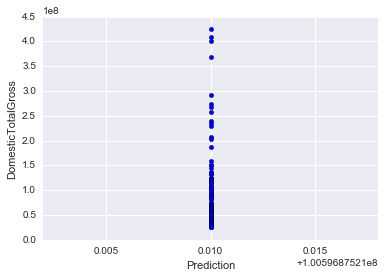

In [66]:
plt.scatter(pred, y)
plt.xlabel('Prediction')
plt.ylabel('DomesticTotalGross')
plt.show()

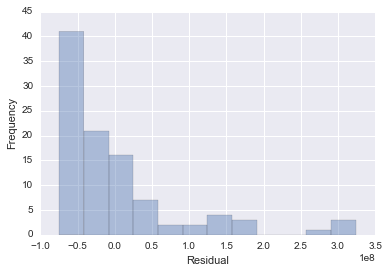

In [67]:
ax = sns.distplot(movies.DomesticTotalGross - pred, kde=False, rug=False)
ax.set(xlabel='Residual', ylabel='Frequency')
plt.show()

The residuals are skewed towards being slightly negative, as the distribution of actual y values are alse left skewed, meaning most values are slightly less than the average y value.

## Challenge 2

In [72]:
y, X = dmatrices('DomesticTotalGross ~ constant + Budget', data=movies, return_type='dataframe')
model = sm.OLS(y, X)
results = model.fit()
pred = results.predict(X)

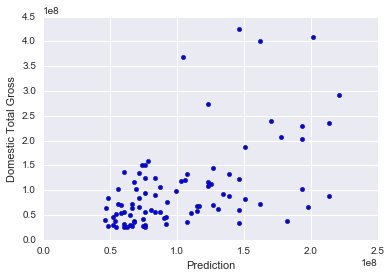

In [73]:
plt.scatter(pred, y)
plt.xlabel('Prediction')
plt.ylabel('Domestic Total Gross')
plt.show()

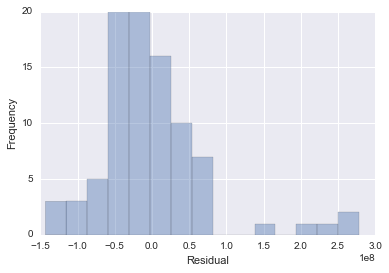

In [80]:
res = y.DomesticTotalGross - pred
ax = sns.distplot(res, kde=False, rug=False)
ax.set(xlabel='Residual', ylabel='Frequency')
plt.show()

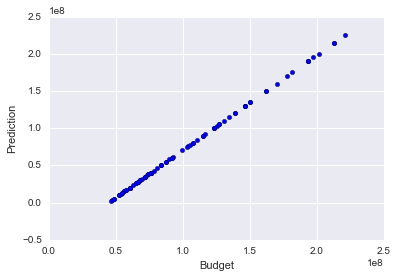

In [75]:
plt.scatter(pred, X.Budget)
plt.xlabel('Budget')
plt.ylabel('Prediction')
plt.show()

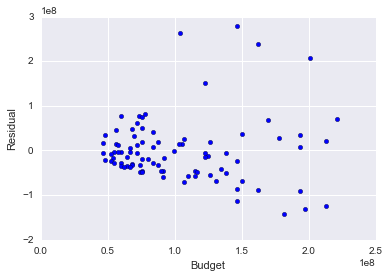

In [76]:
plt.scatter(pred, res)
plt.xlabel('Budget')
plt.ylabel('Residual')
plt.show()

The model is now building the linear regression off of the Budget feature. The residuals increase with the budget, as larger budget films have actual gross numbers further away from the prediction.

## Challenge 3

In [82]:
y, X = dmatrices('DomesticTotalGross ~ constant + Rating', data=movies, return_type='dataframe')
model = sm.OLS(y, X)
results = model.fit()
pred = results.predict(X)

In [87]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     9.089
Date:                Tue, 19 Jul 2016   Prob (F-statistic):           3.77e-06
Time:                        15:21:59   Log-Likelihood:                -1737.0
No. Observations:                  89   AIC:                             3484.
Df Residuals:                      84   BIC:                             3497.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept       -1.012e+07   4.05e+07     -0.250      0.803     -9.08e+07  7.05e+07
Rating[T.PG]     1.438e+07   1.74e+07      0.826      0.411     -2.02e+07   4.9e+07
Rating[T.PG-13] -1.342e+07   1.98e+07     -0.677      0.500     -5.28e+07   2.6e+07
Rating[T.R]     -1.109e+07   2.03e+07     -0.547      0.586     -5.14e+07  2.92e+07
Runtime          6.083e+05   5.21e+05      1.168      0.246     -4.27e+05  1.64e+06
Budget              0.7036      0.165      4.255      0.000         0.375     1.032
==============================================================================
Omnibus:                       36.883   Durbin-Watson:                   0.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.319
Skew:                           1.525   Prob(JB):                     1.33e-18
Kurtosis:                       6.591   Cond. No.                     3.67e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  6e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The model is splitting the categorical feature into n-1 variables with values of 1 or 0, and the missing variable from that category is when all variables have a value of 0.

## Challenge 4

In [84]:
movies.head(2)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,constant
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1


In [85]:
y, X = dmatrices('DomesticTotalGross ~ Rating + Runtime + Budget', data=movies, return_type='dataframe')
model = sm.OLS(y, X)
results = model.fit()

In [86]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     9.089
Date:                Tue, 19 Jul 2016   Prob (F-statistic):           3.77e-06
Time:                        15:21:51   Log-Likelihood:                -1737.0
No. Observations:                  89   AIC:                             3484.
Df Residuals:                      84   BIC:                             3497.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept       -1.012e+07   4.05e+07     -0.250      0.803     -9.08e+07  7.05e+07
Rating[T.PG]     1.438e+07   1.74e+07      0.826      0.411     -2.02e+07   4.9e+07
Rating[T.PG-13] -1.342e+07   1.98e+07     -0.677      0.500     -5.28e+07   2.6e+07
Rating[T.R]     -1.109e+07   2.03e+07     -0.547      0.586     -5.14e+07  2.92e+07
Runtime          6.083e+05   5.21e+05      1.168      0.246     -4.27e+05  1.64e+06
Budget              0.7036      0.165      4.255      0.000         0.375     1.032
==============================================================================
Omnibus:                       36.883   Durbin-Watson:                   0.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.319
Skew:                           1.525   Prob(JB):                     1.33e-18
Kurtosis:                       6.591   Cond. No.                     3.67e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  6e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

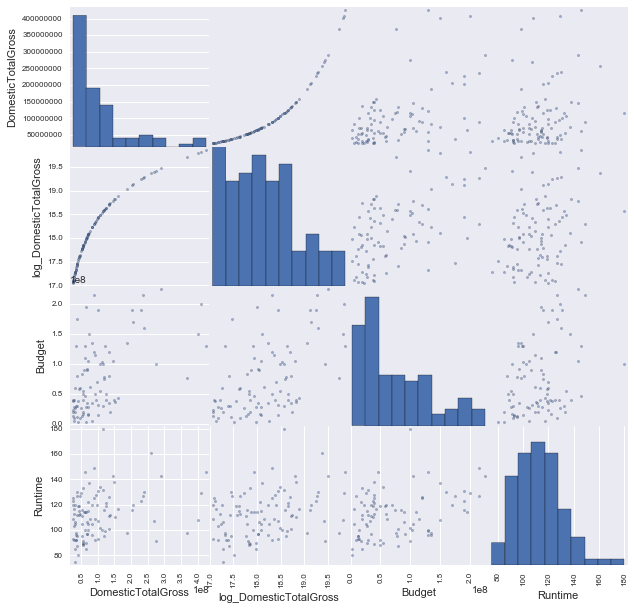

In [114]:
movies['log_DomesticTotalGross'] = np.log(movies.DomesticTotalGross)
movies['log_Budget'] = np.log(movies.Budget)
movies['log_Runtime'] = np.log(movies.Runtime)
movies = movies[['DomesticTotalGross', 'log_DomesticTotalGross', 'Title', 'Budget', 'Rating', 'Runtime']]
plt.rcParams['figure.figsize'] = (10,10)
_ = pd.tools.plotting.scatter_matrix(movies)

In [121]:
y, X = dmatrices('log_DomesticTotalGross ~ Rating + Runtime + Budget', data=movies, return_type='dataframe')
model = sm.OLS(y, X)
results = model.fit()
pred = results.predict(X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     log_DomesticTotalGross   R-squared:                       0.318
Model:                                OLS   Adj. R-squared:                  0.285
Method:                     Least Squares   F-statistic:                     9.788
Date:                    Tue, 19 Jul 2016   Prob (F-statistic):           1.51e-06
Time:                            15:51:10   Log-Likelihood:                -78.450
No. Observations:                      89   AIC:                             166.9
Df Residuals:                          84   BIC:                             179.3
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          12.8413      0.327     39.273      0.000        12.191    13.492
Rating[T.PG]        4.4089      0.140     31.401      0.000         4.130     4.688
Rating[T.PG-13]     4.1957      0.160     26.262      0.000         3.878     4.513
Rating[T.R]         4.2367      0.164     25.909      0.000         3.912     4.562
Runtime             0.0058      0.004      1.385      0.170        -0.003     0.014
Budget           5.892e-09   1.33e-09      4.419      0.000      3.24e-09  8.54e-09
==============================================================================
Omnibus:                        1.700   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.427   Jarque-Bera (JB):                1.421
Skew:                           0.143   Prob(JB):                        0.491
Kurtosis:                       2.451   Cond. No.                     3.67e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  6e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

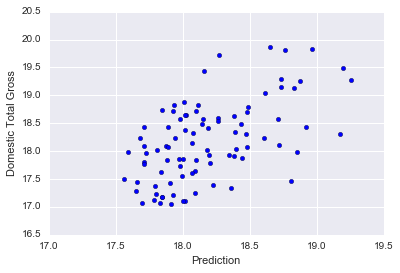

In [122]:
plt.rcParams['figure.figsize'] = (6,4)
plt.scatter(pred, y)
plt.xlabel('Prediction')
plt.ylabel('Domestic Total Gross')
plt.show()

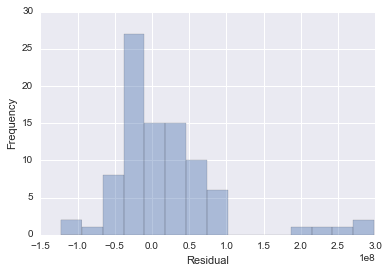

In [117]:
res = np.exp(y.log_DomesticTotalGross) - np.exp(pred)
ax = sns.distplot(res, kde=False, rug=False)
ax.set(xlabel='Residual', ylabel='Frequency')
plt.show()

Adding features and log transforming Domestic Total Gross helped give a better distribution.

## Challenge 5

In [123]:
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)

model = LinearRegression().fit(X_train, y_train)
pred = model.predict(X_test)

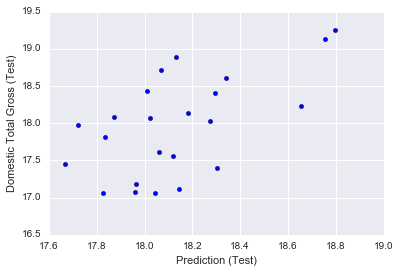

In [124]:
plt.scatter(pred, y_test)
plt.xlabel('Prediction (Test)')
plt.ylabel('Domestic Total Gross (Test)')
plt.show()